In [1]:
%matplotlib notebook
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import seaborn as sns
import colorlover as cl
import brewer2mpl
from scipy import stats

py.offline.init_notebook_mode(connected=True)

matplotlib data path /home/milicak/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data
loaded rc file /home/milicak/.config/matplotlib/matplotlibrc
matplotlib version 2.1.2
verbose.level helpful
interactive is False
platform is linux2
$HOME=/home/milicak
CACHEDIR=/home/milicak/.cache/matplotlib
Using fontManager instance from /home/milicak/.cache/matplotlib/fontList.json
backend nbAgg version unknown
backend nbAgg version unknown


In [2]:
''' Read datasets '''
seaicedata = pd.read_excel('/home/milicak/Analysis/NorESM/Arctic_seaice/Analysis/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx',  sheet_name='NH-Extent')
df = pd.read_csv('modelsGSexps.csv')

fname0 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/ITU-MOM/ITU-MOM_GSexps_1980_2009.nc'
ds0 = xr.open_mfdataset(fname0)

fname1 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/MITB500/MIT_MITB500_1980_2009.nc'
ds1 = xr.open_mfdataset(fname1)

fname2 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/Brest/Brest_GSexps_1980_2009.nc'
ds2 = xr.open_mfdataset(fname2)

fname3 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/NorESM/NorESM_GS_experiments_1980_2009.nc'
ds3 = xr.open_mfdataset(fname3)

fname4 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/FESOM/FESOM_GS_exps_1980_2009.nc'
ds4 = xr.open_mfdataset(fname4)

In [3]:
'''Set time counter'''
dates0 = pd.date_range('1980-01', freq='M', periods=12*29)
ds0['time'] = dates0
ds1['time'] = dates0
ds2['time'] = dates0
ds3['time'] = dates0
ds4['time'] = dates0

<IPython.core.display.Javascript object>


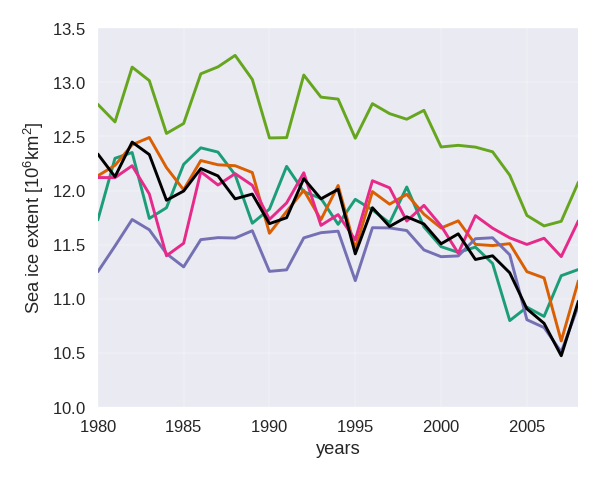

Text(0,0.5,u'Sea ice extent [$10^6$km$^2$]')

In [7]:
'''plot sea ice extent NH between models control and NSIDC'''
modelnames = ['ITU' , 'MITB500', 'Brest', 'NorESM', 'FESOM']
colors = brewer2mpl.get_map('Dark2', 'Qualitative', 5)
cmap = plt.get_cmap('Dark2')

ctln = ['ctlxice', 'SIext_c', 'refice_extent_NH', 'ice_extent_NorESM_NH_ctrl', 'ctliext']
gspn = ['gspxice', 'SIext_gsp', 'gspice_extent_NH', 'ice_extent_NorESM_NH_gsp', 'gspiext']
gsnn = ['gsnxice', 'SIext_gsm', 'gsnice_extent_NH', 'ice_extent_NorESM_NH_gsn', 'gsniext']
coeffs = [1e-12, 1e-12, 1e-12, 1e-12, 1e-12]

plt.figure(figsize=(5,4))
for ind,mdl in enumerate(modelnames):
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean().year'
    time = np.copy(eval(dnm))
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean()'
    val1 = (np.copy(eval(dnm))*coeffs[ind])
    plt.plot(time, val1, color = cmap.colors[ind], label=mdl)

    
plt.plot(seaicedata['Annual'][2:-10],'k', label='NSIDC')   
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=2,
           ncol=3, mode="expand", borderaxespad=0.) 

plt.xlabel('years')
plt.ylim((10,13.5))
plt.ylabel(r"Sea ice extent [$10^6$km$^2$]")

<IPython.core.display.Javascript object>


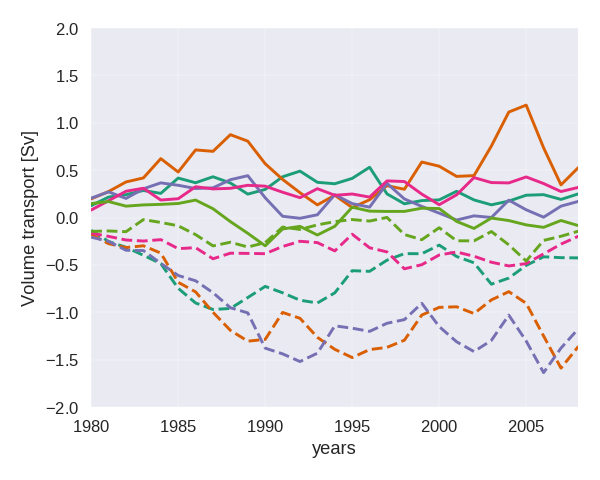

Text(0,0.5,u'Volume transport [Sv]')

In [5]:
'''plot volume anomalies at BSO'''

#colors = cl.scales['5']['qual']['Dark2']; 
modelnames = ['ITU' , 'MITB500', 'Brest', 'NorESM', 'FESOM']
colors = brewer2mpl.get_map('Dark2', 'Qualitative', 5)
cmap = plt.get_cmap('Dark2')

plt.figure(figsize=(5,4))
for ind,mdl in enumerate(modelnames):
    plt.plot(df.time[((df["models"]==mdl) & (df["direction"]==1))], 
         df.volume[((df["models"]==mdl) & (df["direction"]==1))], color = cmap.colors[ind], label=mdl)
    plt.plot(df.time[((df["models"]==mdl) & (df["direction"]==-1))], 
         df.volume[((df["models"]==mdl) & (df["direction"]==-1))], color = cmap.colors[ind], linestyle='dashed', label='_nolegend_')
    
    
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=2,
           ncol=3, mode="expand", borderaxespad=0.)  
plt.ylim((-2,2))
plt.xlabel('years')
plt.ylabel('Volume transport [Sv]')

<IPython.core.display.Javascript object>


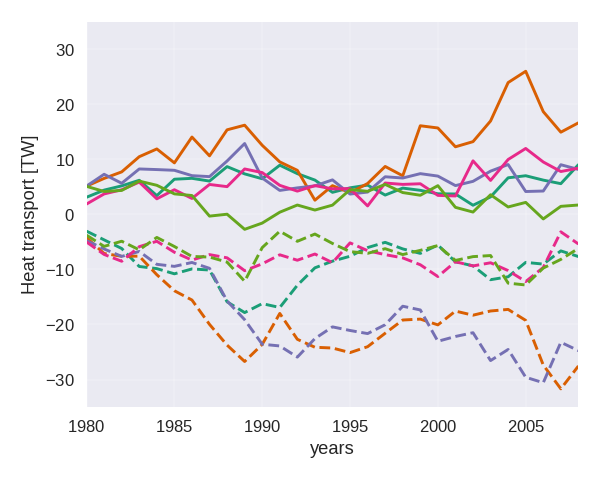

Text(0,0.5,u'Heat transport [TW]')

In [8]:
'''plot heat anomalies at BSO'''

plt.figure(figsize=(5,4))
for ind,mdl in enumerate(modelnames):
    plt.plot(df.time[((df["models"]==mdl) & (df["direction"]==1))], 
         df.heat[((df["models"]==mdl) & (df["direction"]==1))], color = cmap.colors[ind], label=mdl)
    plt.plot(df.time[((df["models"]==mdl) & (df["direction"]==-1))], 
         df.heat[((df["models"]==mdl) & (df["direction"]==-1))],color = cmap.colors[ind], linestyle='dashed', label='_nolegend_')

    
#exec('line'+np.str(ind-1)+'=line4')    
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=2,
           ncol=3, mode="expand", borderaxespad=0.)  
plt.ylim((-35,35))
plt.xlabel('years')
plt.ylabel('Heat transport [TW]')   

<IPython.core.display.Javascript object>


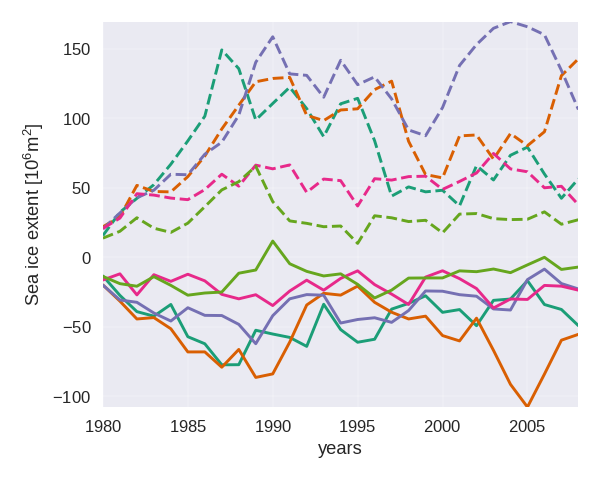

Text(0,0.5,u'Sea ice extent [$10^6$m$^2$]')

In [9]:
'''plot sea ice extent anomalies at BSO'''

plt.figure(figsize=(5,4))
for ind,mdl in enumerate(modelnames):
    plt.plot(df.time[((df["models"]==mdl) & (df["direction"]==1))], 
         df.seaiceextBS[((df["models"]==mdl) & (df["direction"]==1))], color = cmap.colors[ind], label=mdl)
    plt.plot(df.time[((df["models"]==mdl) & (df["direction"]==-1))], 
         df.seaiceextBS[((df["models"]==mdl) & (df["direction"]==-1))],color = cmap.colors[ind], linestyle='dashed', label='_nolegend_')

    
#exec('line'+np.str(ind-1)+'=line4')    
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=2,
           ncol=3, mode="expand", borderaxespad=0.)  
#plt.ylim((-2,2))
plt.xlabel('years')
plt.ylabel('Sea ice extent [$10^6$m$^2$]')

<IPython.core.display.Javascript object>


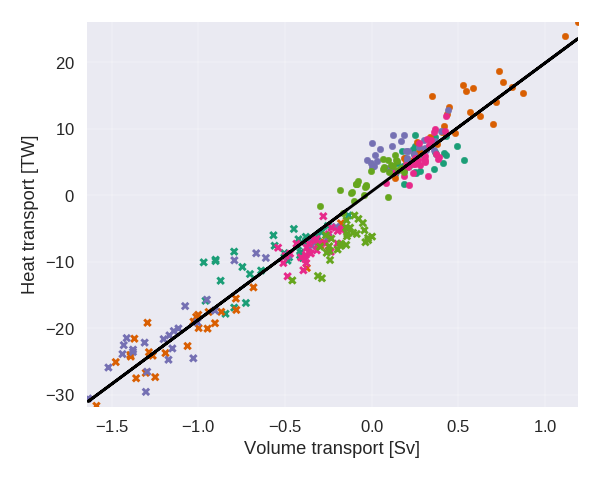

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(df.volume), np.array(df.heat))
line = slope*np.array(df.volume)+intercept
plt.figure(figsize=(5,4))
#plt.title(r"m$\alpha$th language")
for ind,mdl in enumerate(modelnames):
    plt.scatter(df.volume[((df["models"]==mdl) & (df["direction"]==1))], 
         df.heat[((df["models"]==mdl) & (df["direction"]==1))], color = cmap.colors[ind], s=15, label=mdl)
    plt.scatter(df.volume[((df["models"]==mdl) & (df["direction"]==-1))], 
         df.heat[((df["models"]==mdl) & (df["direction"]==-1))],color = cmap.colors[ind], linestyle='dashed', marker='x',s=15, label='_nolegend_')
    
plt.plot(np.array(df.volume),line,'k')
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=2,
           ncol=3, mode="expand", borderaxespad=0.) 
plt.xlabel('Volume transport [Sv]')
plt.ylabel('Heat transport [TW]')
plt.tight_layout()

<IPython.core.display.Javascript object>


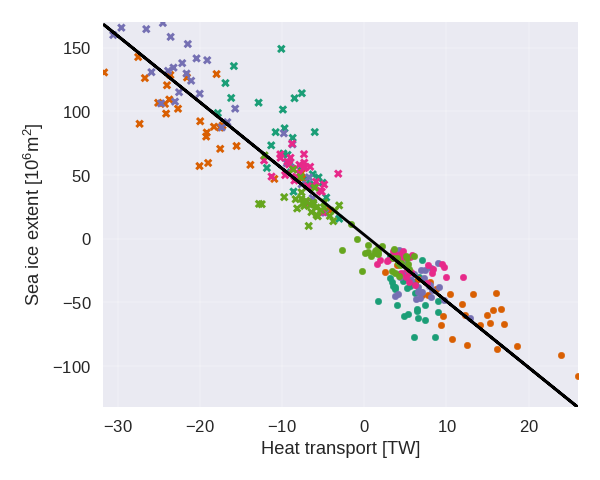

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(df.heat), np.array(df.seaiceextBS))
line = slope*np.array(df.heat)+intercept
plt.figure(figsize=(5,4))
#plt.title(r"m$\alpha$th language")
for ind,mdl in enumerate(modelnames):
    plt.scatter(df.heat[((df["models"]==mdl) & (df["direction"]==1))], 
         df.seaiceextBS[((df["models"]==mdl) & (df["direction"]==1))], color = cmap.colors[ind], s=15, label=mdl)
    plt.scatter(df.heat[((df["models"]==mdl) & (df["direction"]==-1))], 
         df.seaiceextBS[((df["models"]==mdl) & (df["direction"]==-1))],color = cmap.colors[ind], linestyle='dashed', marker='x',s=15, label='_nolegend_')
    
plt.plot(np.array(df.heat),line,'k')
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=2,
           ncol=3, mode="expand", borderaxespad=0.) 
plt.xlabel('Heat transport [TW]')
plt.ylabel('Sea ice extent [$10^6$m$^2$]')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(df.heat, df.seaiceextBS)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(df.heat), np.array(df.seaiceextBS))
line = slope*np.array(df.heat)+intercept
plt.plot(np.array(df.heat),line,'r')
#plt.grid(False)

In [ ]:
seaicedata = pd.read_excel('Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx',  sheet_name='NH-Extent')

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(seaicedata['Annual'][2:-9])
plt.plot(df.seaiceextNH)

In [ ]:
seaicedata['Annual'][2:-9]

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()